In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
from skimage import io, transform
import os
import pandas as pd
import torch
import random
import cv2
from PIL import Image
from torch.utils.data import Dataset,DataLoader
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [21]:
data_path = 'C:/Users/moravapa/Desktop/Masters/DataSet/train.txt'
data = pd.read_csv(data_path,sep=" " )
                   #(, names=['Image_Name', 'Label'])

img_name = data.iloc[:,0]
label = data.iloc[:, 1]
#print(label)
#print(img_name)
#print(label)
idx_to_class = {
    "Normal" : 0,
    "COVID" : 1 ,
    "pneumonia" : 2,
    "Lung_Opacity" : 3,
}
#print(data.value_counts())

1546cd86-7be1-4c3c-934b-ef271c198c92.png  Normal      
000013af-e145-469a-a79f-8acb23e194e2.png  Lung_Opacity    1
acbd0c22-2445-451e-9dca-437446a32dc6.png  Normal          1
ac87dbec-a492-4b0a-808a-d2f4ab8fcab4.png  Normal          1
ac8911c1-fc38-4752-8499-fb045c6e7bb7.png  Lung_Opacity    1
ac8995e6-0fe3-47f6-873f-c72aa7aa9a8e.png  Normal          1
                                                         ..
56c279ba-6c01-4e1e-9665-051b94c3925a.png  Normal          1
56c5bf59-8326-4d94-be0c-07ee70d807a1.png  Normal          1
56c720ab-0c61-4d82-98fc-6c6203e068c5.png  Normal          1
56c897b7-194c-4075-9521-3114ab3cd808.png  Lung_Opacity    1
fffbb1fb-8f36-49d5-9c80-f8fbefa89c4c.png  Normal          1
Length: 16928, dtype: int64


In [3]:
class xray_Dataset(Dataset):

    def __init__(self, txt_file, root_dir,idx_to_class, transform=None):
        """
        Args:
            csv_file (string): Path to the txt file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_list = pd.read_csv(txt_file,sep=" ",names=['Image_Name', 'Label'] )
        self.root_dir = root_dir
        self.transform = transform
        self.idx_to_class = idx_to_class

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = os.path.join(self.root_dir,self.data_list.iloc[idx,0])
        image = io.imread(img_name)
        image = Image.fromarray(image)
        label = self.data_list.iloc[idx, 1]
        #print(self.idx_to_class)
        label = self.idx_to_class[label]
        

        if self.transform:
            image = self.transform(image)

        return image, label

In [4]:
train_transforms = transforms.Compose([
                                   transforms.Resize(224),
                                   transforms.ToTensor(),
                                   ])

test_transforms = transforms.Compose([transforms.Resize(224),
                                  transforms.ToTensor(),
                                  #transforms.Normalize([0.485, 0.456, 0.406],
                                  #                     [0.229, 0.224, 0.225])
                                  ])

In [5]:
xray_dataset = xray_Dataset(txt_file=data_path,root_dir='C:/Users/moravapa/Desktop/Masters/DataSet/train',idx_to_class = idx_to_class,transform =train_transforms)

In [6]:
def load_split_train_test(datadir):
    
 

    train_size = int(0.8 * len(xray_dataset))
    test_size = len(xray_dataset) - train_size
    
    train_dataset, test_dataset = torch.utils.data.random_split(xray_dataset, [train_size, test_size])
    train_transforms = transforms.Compose([
                                   transforms.Resize(224),
                                   transforms.ToTensor(),
                                   ])

    test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                      #                     [0.229, 0.224, 0.225])
                                      ])
        
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle = True)
    testloader = torch.utils.data.DataLoader(test_dataset,  batch_size=64, shuffle= True)
    
    return trainloader, testloader

trainloader, testloader = load_split_train_test(xray_dataset)
print(len(trainloader))
print(len(testloader))

#next(iter(testloader))[1].shape



212
53


In [7]:
data_iter = iter(trainloader)
images,labels = data_iter.next()
#image.squeeze().permute(1,2,3,0)
print(images.shape)
#images = images.swapaxes(1,3)
#print(images.shape)
images,labels


torch.Size([64, 3, 224, 224])


(tensor([[[[0.1020, 0.1059, 0.1098,  ..., 0.8392, 0.8392, 0.7686],
           [0.1059, 0.1176, 0.1255,  ..., 0.9255, 0.9294, 0.8549],
           [0.1059, 0.1137, 0.1176,  ..., 0.9216, 0.9255, 0.8510],
           ...,
           [0.5765, 0.6157, 0.6078,  ..., 0.1333, 0.2941, 0.4431],
           [0.5686, 0.6039, 0.5961,  ..., 0.0941, 0.1137, 0.1765],
           [0.5059, 0.5294, 0.5255,  ..., 0.0863, 0.0941, 0.0863]],
 
          [[0.1020, 0.1059, 0.1098,  ..., 0.8392, 0.8392, 0.7686],
           [0.1059, 0.1176, 0.1255,  ..., 0.9255, 0.9294, 0.8549],
           [0.1059, 0.1137, 0.1176,  ..., 0.9216, 0.9255, 0.8510],
           ...,
           [0.5765, 0.6157, 0.6078,  ..., 0.1333, 0.2941, 0.4431],
           [0.5686, 0.6039, 0.5961,  ..., 0.0941, 0.1137, 0.1765],
           [0.5059, 0.5294, 0.5255,  ..., 0.0863, 0.0941, 0.0863]],
 
          [[0.1020, 0.1059, 0.1098,  ..., 0.8392, 0.8392, 0.7686],
           [0.1059, 0.1176, 0.1255,  ..., 0.9255, 0.9294, 0.8549],
           [0.1059, 0.11

Text(0.5, 1.0, 'tensor([3, 3, 0, 1, 0, 3, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 3, 0, 3,\n        3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 3, 0, 1, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0,\n        0, 0, 3, 1, 3, 0, 0, 3, 0, 1, 1, 3, 3, 0, 0, 0])')

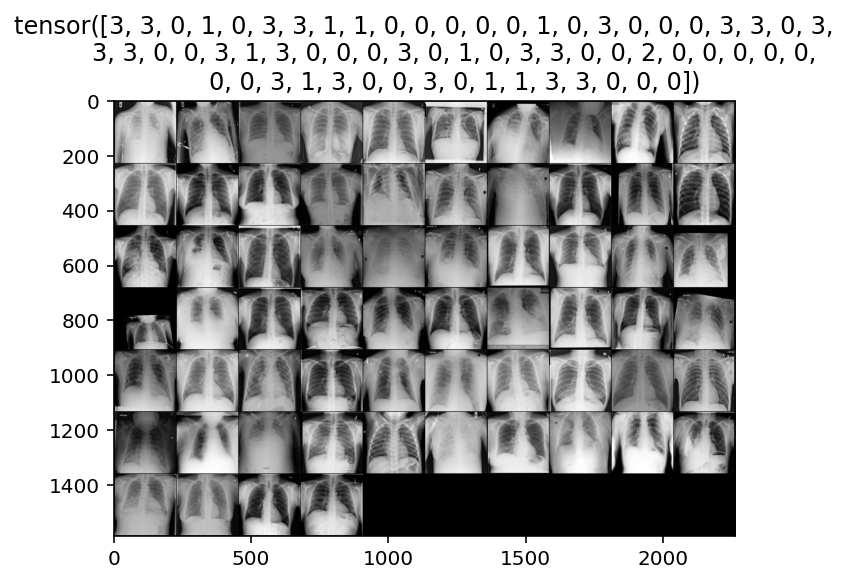

In [9]:
import torchvision
plt.imshow(torchvision.utils.make_grid(images, nrow=10).permute(1, 2, 0))
plt.title(labels)


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [40]:
weights = [1-(8153/16928), 1-(2892/16928), 1-(1076/16928), 1-(4809/16928) ] #as class distribution
class_weights = torch.FloatTensor(weights).cuda()
print(class_weights)
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.LeakyReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 4),
                                 nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
model.to(device)


tensor([0.5184, 0.8292, 0.9364, 0.7159], device='cuda:0')


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
epochs = 3
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses = [], []

for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        #print('debug')
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()

                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/3.. Train loss: 1.265.. Test loss: 1.171.. Test accuracy: 0.530
Epoch 1/3.. Train loss: 1.150.. Test loss: 1.086.. Test accuracy: 0.611
Epoch 1/3.. Train loss: 1.051.. Test loss: 0.989.. Test accuracy: 0.655
Epoch 1/3.. Train loss: 0.944.. Test loss: 0.921.. Test accuracy: 0.666
Epoch 1/3.. Train loss: 0.904.. Test loss: 0.874.. Test accuracy: 0.740
Epoch 1/3.. Train loss: 0.870.. Test loss: 0.819.. Test accuracy: 0.742
Epoch 1/3.. Train loss: 0.813.. Test loss: 0.803.. Test accuracy: 0.708
Epoch 1/3.. Train loss: 0.756.. Test loss: 0.760.. Test accuracy: 0.760
Epoch 1/3.. Train loss: 0.759.. Test loss: 0.785.. Test accuracy: 0.692
Epoch 1/3.. Train loss: 0.715.. Test loss: 0.724.. Test accuracy: 0.766
Epoch 1/3.. Train loss: 0.716.. Test loss: 0.702.. Test accuracy: 0.756
Epoch 1/3.. Train loss: 0.702.. Test loss: 0.692.. Test accuracy: 0.775
Epoch 1/3.. Train loss: 0.674.. Test loss: 0.679.. Test accuracy: 0.748
Epoch 1/3.. Train loss: 0.715.. Test loss: 0.652.. Test accuracy

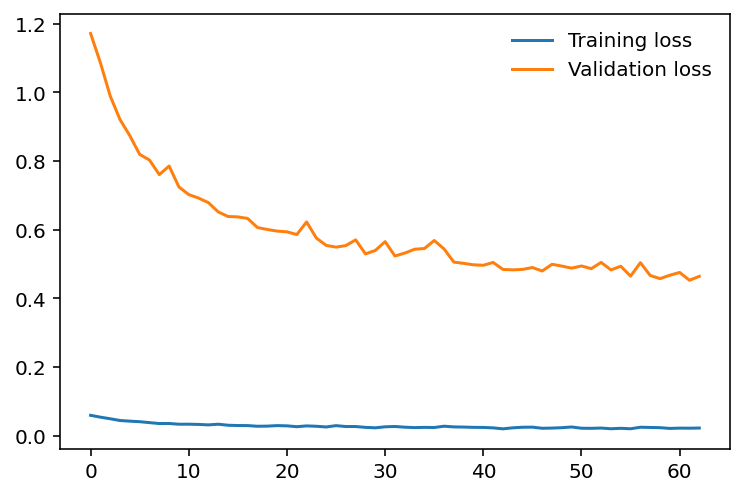

In [43]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
#plt.plot(test_accuracy, label='test_accuracy')
plt.legend(frameon=False)
plt.show()